# Import

In [95]:
import numpy as np
from preprocessing import Preprocessing
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

# Data

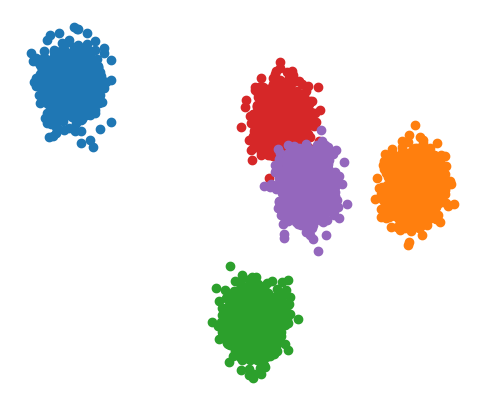

In [96]:
N = 1000
CENTERS = np.random.randint(-10, 10, (5, 2))
DATA = np.concatenate([np.random.multivariate_normal(center, np.eye(2), size=N) + center for center in CENTERS], axis=0)
THRESHOLD = 0.2

plt.figure(figsize=(6, 5))
for idx_center, center in enumerate(CENTERS):
    plt.scatter(DATA[idx_center * N:(idx_center + 1) * N, 0], DATA[idx_center * N:(idx_center + 1) * N, 1], label=f'Center {idx_center}')
# plt.legend()
plt.axis('off')
plt.savefig(f"../../fig/model/raw_data.png", bbox_inches='tight')

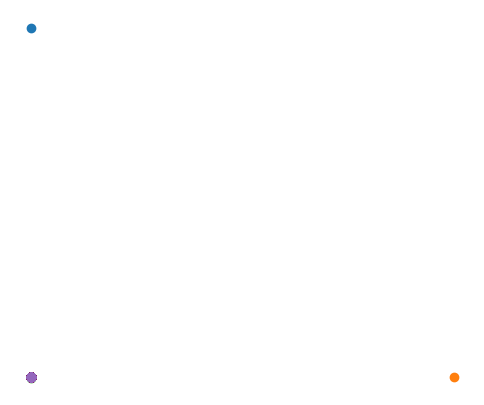

In [97]:
extreme_data = Preprocessing.transform_to_extreme_values(DATA)

plt.figure(figsize=(6, 5))
for idx_center, center in enumerate(CENTERS):
    plt.scatter(extreme_data[idx_center * N:(idx_center + 1) * N, 0], extreme_data[idx_center * N:(idx_center + 1) * N, 1], label=f'Center {idx_center}')
# plt.legend()
plt.axis('off')
plt.savefig(f"../../fig/model/extreme_data.png", bbox_inches='tight')

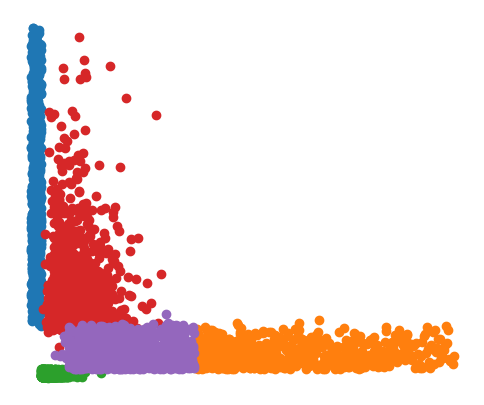

In [98]:
largest_data,cut_off = Preprocessing.filter_largest(extreme_data, THRESHOLD)

plt.figure(figsize=(6, 5))
for idx_center, center in enumerate(CENTERS):
    largest_data_k = extreme_data[idx_center * N:(idx_center + 1) * N]
    largest_data_k = largest_data_k[np.linalg.norm(largest_data_k, axis=1) < cut_off]
    plt.scatter(largest_data_k[:, 0], largest_data_k[:, 1], label=f'Center {idx_center}')
plt.axis('off')
plt.savefig(f"../../fig/model/largest_data.png", bbox_inches='tight')

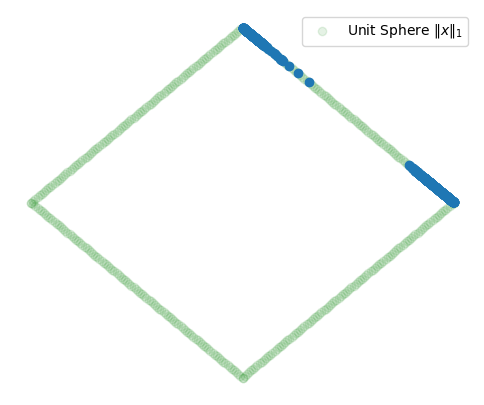

In [99]:
sphere_data = Preprocessing.project_onto_unit_sphere(largest_data)

plt.figure(figsize=(6, 5))
plt.scatter(np.linspace(0, 1, 100), 1 - np.linspace(0, 1, 100), color="green", alpha=0.1)
plt.scatter(np.linspace(0, 1, 100), -(1 - np.linspace(0, 1, 100)), color="green", alpha=0.1)
plt.scatter(np.linspace(-1, 0, 100), 1 - abs(np.linspace(-1, 0, 100)), color="green", alpha=0.1)
plt.scatter(np.linspace(-1, 0, 100), -(1 - abs(np.linspace(-1, 0, 100))), color="green", alpha=0.1, label = rf"Unit Sphere $ \| x \|_1$")
plt.scatter(sphere_data[:, 0], sphere_data[:, 1])
plt.legend(loc='best')
plt.axis('off')
plt.savefig(f"../../fig/model/unit_sphere_data.png", bbox_inches='tight')

In [100]:
sphere_data.shape

(1000, 2)

# Clustering

In [115]:
from spherical_k_means import ExtremeSphericalKMeans

kmeans = ExtremeSphericalKMeans(n_clusters=2, max_iter=100, threshold=THRESHOLD)
kmeans.fit(DATA)

TypeError: random() takes at most 1 positional argument (2 given)

(np.float64(-1.1), np.float64(1.1), np.float64(-1.1), np.float64(1.1))

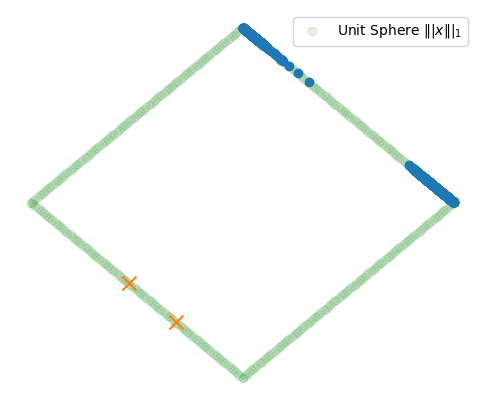

In [113]:
plt.figure(figsize=(6, 5))

plt.scatter(np.linspace(0, 1, 100), 1 - np.linspace(0, 1, 100), color="green", alpha=0.1)
plt.scatter(np.linspace(0, 1, 100), -(1 - np.linspace(0, 1, 100)), color="green", alpha=0.1)
plt.scatter(np.linspace(-1, 0, 100), 1 - abs(np.linspace(-1, 0, 100)), color="green", alpha=0.1)
plt.scatter(np.linspace(-1, 0, 100), -(1 - abs(np.linspace(-1, 0, 100))), color="green", alpha=0.1, label = rf"Unit Sphere $ \|| x \||_1$")

plt.scatter(sphere_data[:, 0], sphere_data[:, 1])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", s=100)
    
plt.legend(loc='best')
plt.axis('off')
